## MNIST

Questions;

- What does the gradient dLdx look like? Is it accurate?
- If we follow the gradient, where does it take us?
- What does the mri of our inputs look like?
- How does subsampling k-space effect the information present?
- ?

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 10

inputs = tf.constant(mnist.train.images[:10, ...])
x = tf.reshape(inputs, [batch_size, 28, 28])
x = tf.cast(x, tf.complex64)
x.shape, x.dtype

(TensorShape([Dimension(10), Dimension(28), Dimension(28)]), tf.complex64)

## Grad of MRI fn

Baseline should be. Just follow dLdx down to its minimum. Problem is that dLdx is only approximate as we cannot recover all of the info (b.c. of the noise/masking)

In [5]:
def gradient_descent(f, x, lr=0.01):
    """
    A simple implementation.
    Problem is:
        x* = argmin_x || f(x) - y || + R(x)
    But we ignore R(x) for now.
    
    Args:
        x (tf.tensor): a ground truth image
        f (forward function):
            __call__: x -> y
            dLdx (func): dLdx: y, x -> g. provides gradients of L w.r.t x
        lr (float): the learning rate
    
    Returns:
        (tf.tensor): reconstruction
    """
    # TODO could extend to some simple compressed sensing algols?
    
    # forward process
    y = f(x)
    
    # NOTE x_t = tf.ifft2d(y) could init with ifft2d, but
    # it is really good and dLdx can not help us!?!?!?
    # but if dLdx != 0 then there is error? ???

    # guess x
    x_t = tf.random_normal(shape=y.shape, dtype=tf.float32)
    
    values = [x_t]
    for i in range(30):
        x_t -= lr*f.dLdx(y, x_t)
        values.append(x_t)
    return values

In [7]:
def plotter(mnist, y, z, masks):
    for i in range(3):
        plt.figure(figsize=(16, 8))
        plt.subplot(1, 5, 1)
        plt.title('Im')
        plt.imshow(mnist.train.images[i, ...].reshape((28, 28)), cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.subplot(1, 5, 2)
        plt.title('Real')
        plt.imshow(np.real(y[i]).reshape((28, 28)))
        plt.axis('off')
        plt.subplot(1, 5, 3)
        plt.title('Imag')
        plt.imshow(np.imag(y[i]).reshape((28, 28)))
        plt.axis('off')
        plt.subplot(1, 5, 4)
        plt.title('ifft')
        plt.imshow(np.real(z[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.subplot(1, 5, 5)
        plt.title('mask')
        plt.imshow(np.real(masks[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
        plt.axis('off')

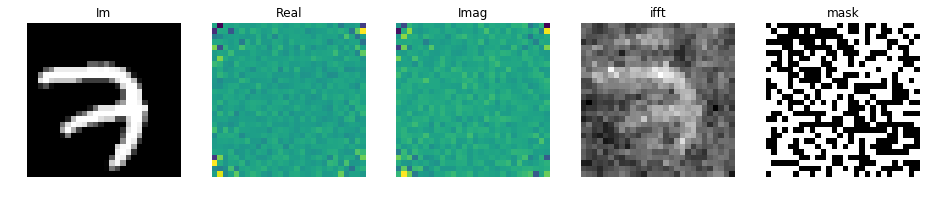

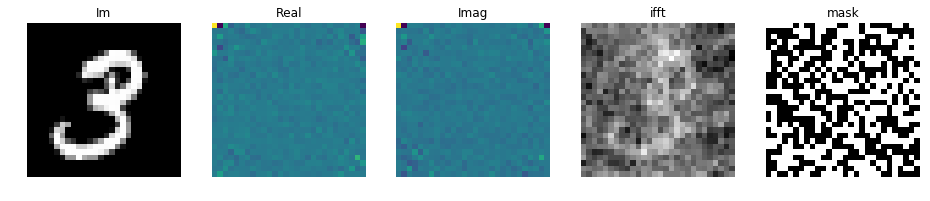

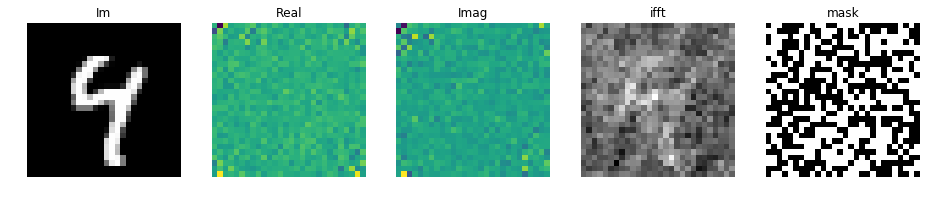

In [8]:
f = mri.MRI(4)

y = f(x)
z = tf.ifft2d(y)

plotter(mnist, y, z, f.mask)
# not sure these masks are correct!?

In [12]:
f = mri.MRI()

y = f(x)
z = tf.ifft2d(y)
d = descend(y, dLdx)

In [31]:
# r = tf.random_normal((10, 28, 28))
# r = tf.complex(r, r)
grad = f.dLdx(y, x)

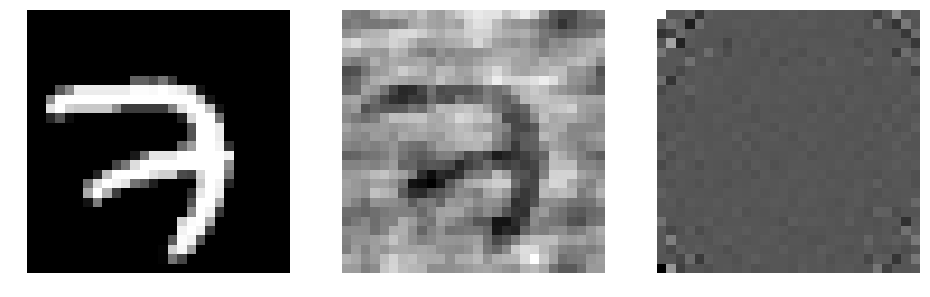

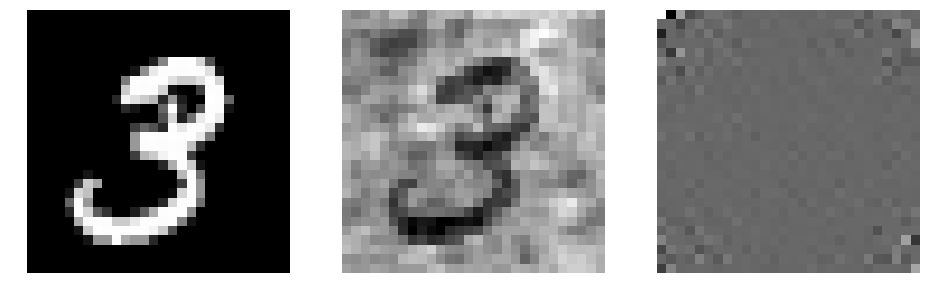

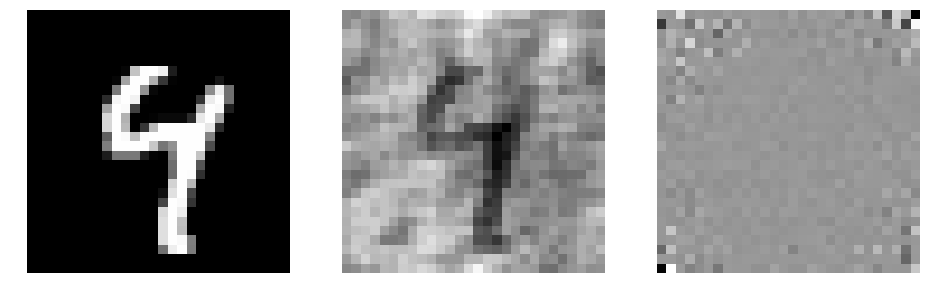

In [32]:
for i in range(3):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(np.real(x[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(np.real(grad[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(np.real(y[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')

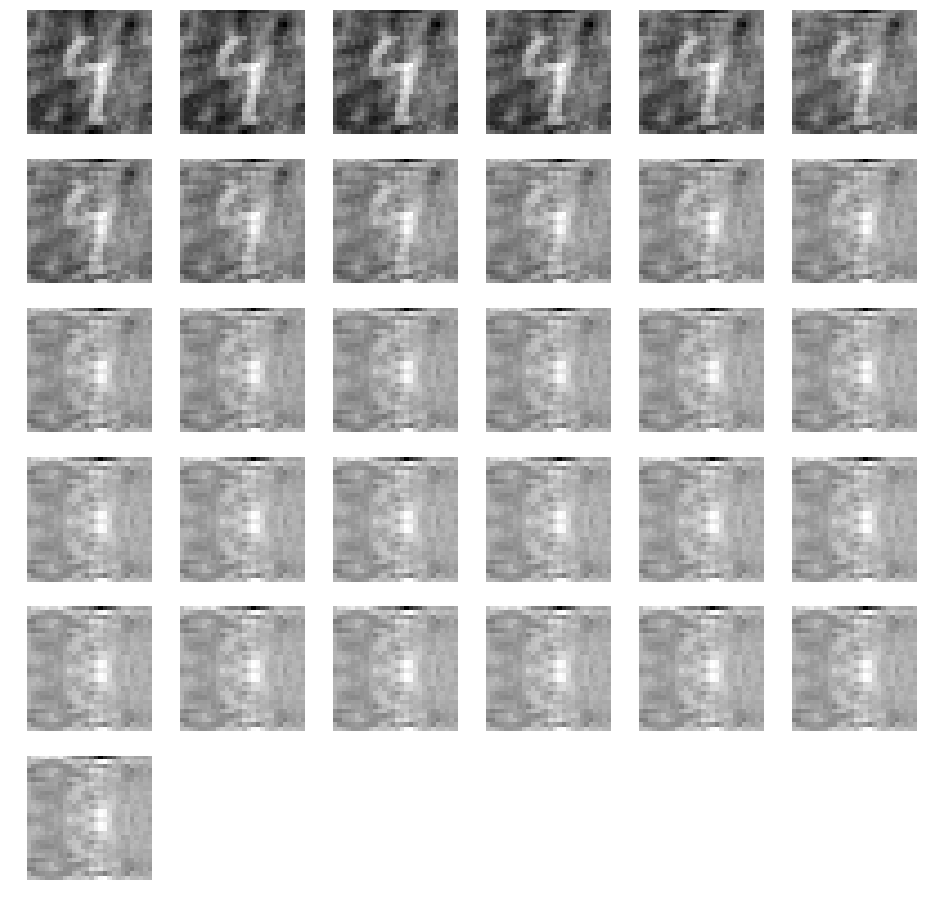

In [15]:
plt.figure(figsize=(16, 16))
for i in range(len(d)):
    plt.subplot(6, 6, i+1)
    plt.imshow(np.real(d[i][2]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')

In [49]:
with tf.GradientTape() as tape:
    x = tf.contrib.eager.Variable(x)
    y = tf.ifft2d(f(x))
    loss = tf.losses.mean_squared_error(x, y)

grad = tape.gradient(loss, [x])[0]

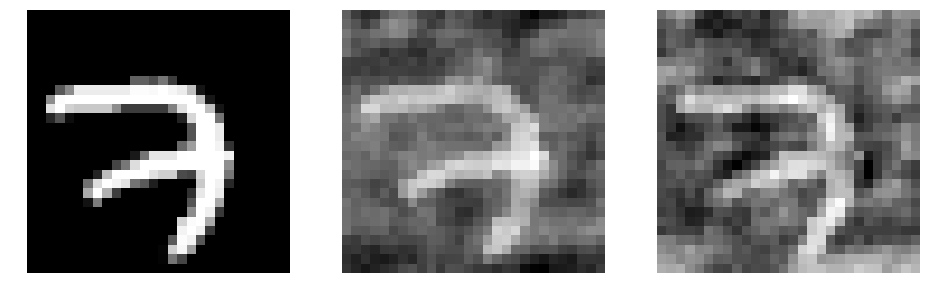

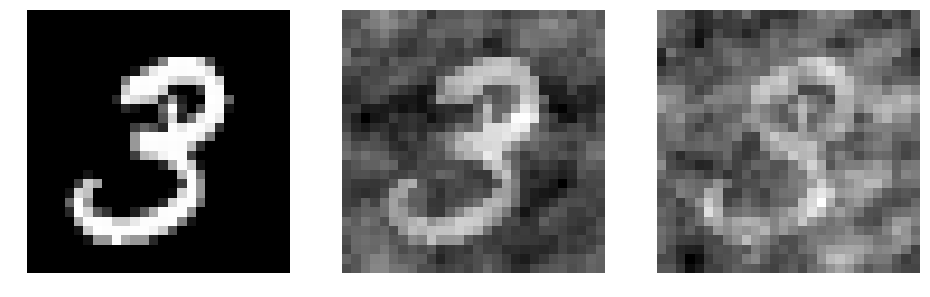

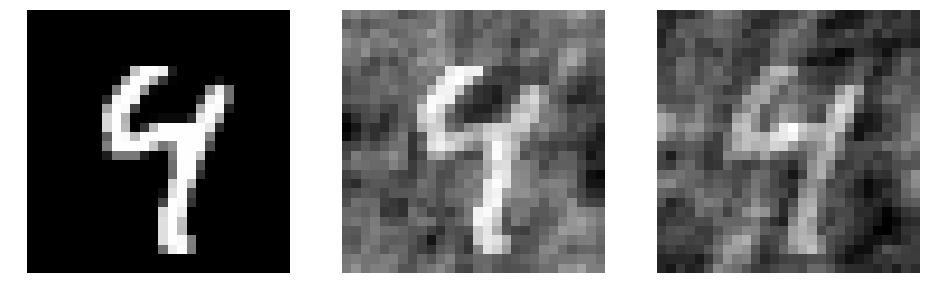

In [50]:
for i in range(3):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(np.real(x[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(np.real(grad[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(np.real(y[i]).reshape((28, 28)), cmap='gray', interpolation='nearest')
    plt.axis('off')